In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import importlib
import seaborn as sns

name_columns =[  
    "Идентификатор пассажира",
    "Выжил",
    "Класс билета", 
    "Имя",
    "Пол",
    "Возраст",
    "Количество братьев/сестер/супругов на борту",
    "Количество родителей/детей на борту",
    "Номер билета",
    "Стоимость билета",
    "Номер каюты",
    "Порт посадки"
    ]

data = pd.read_csv('./data_tms.csv', header=0, delimiter=r",", names=name_columns)

data.head(5)




,Идентификатор пассажира,Выжил,Класс билета,Имя,Пол,Возраст,Количество братьев/сестер/супругов на борту,Количество родителей/детей на борту,Номер билета,Стоимость билета,Номер каюты,Порт посадки
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
np.shape(data)

(891, 12)


Анализ столбца: Идентификатор пассажира
Тип данных: int64


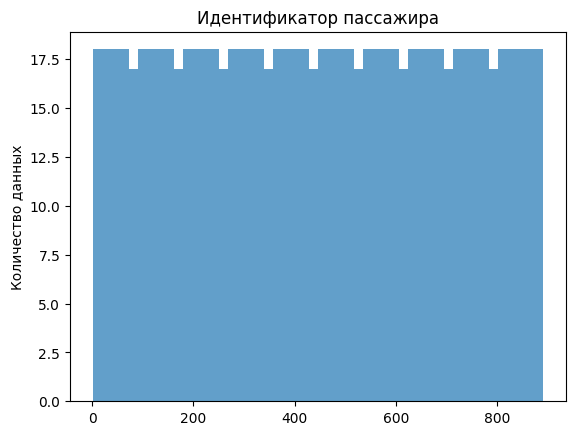

Мин: 1, Макс: 891
Среднее: 446.00, Медиана: 446.00
--------------------------------------------------

Анализ столбца: Выжил
Тип данных: int64


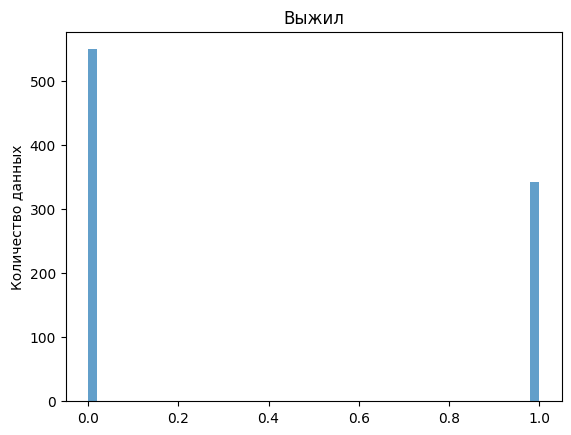

Мин: 0, Макс: 1
Среднее: 0.38, Медиана: 0.00
--------------------------------------------------

Анализ столбца: Класс билета
Тип данных: int64


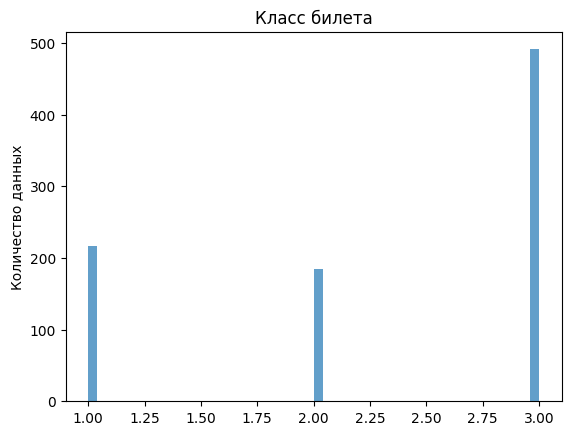

Мин: 1, Макс: 3
Среднее: 2.31, Медиана: 3.00
--------------------------------------------------

Анализ столбца: Имя
Тип данных: object
Уникальные значения: 891
Слишком много уникальных значений (891) для bar plot
--------------------------------------------------

Анализ столбца: Пол
Тип данных: object
Уникальные значения: 2


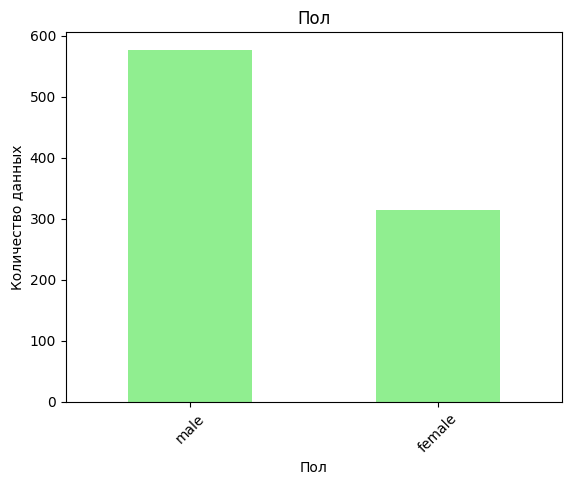

--------------------------------------------------

Анализ столбца: Возраст
Тип данных: float64


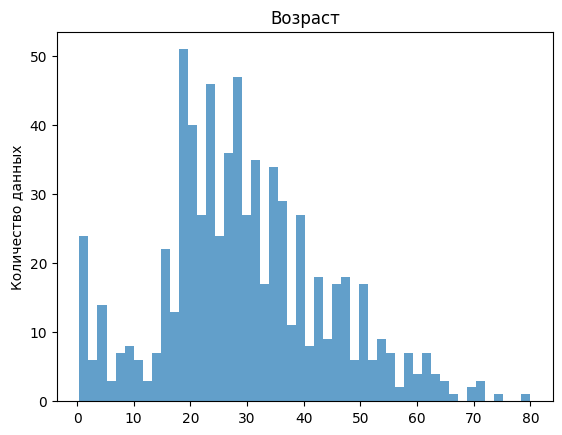

Мин: 0.42, Макс: 80.0
Среднее: 29.70, Медиана: 28.00
--------------------------------------------------

Анализ столбца: Количество братьев/сестер/супругов на борту
Тип данных: int64


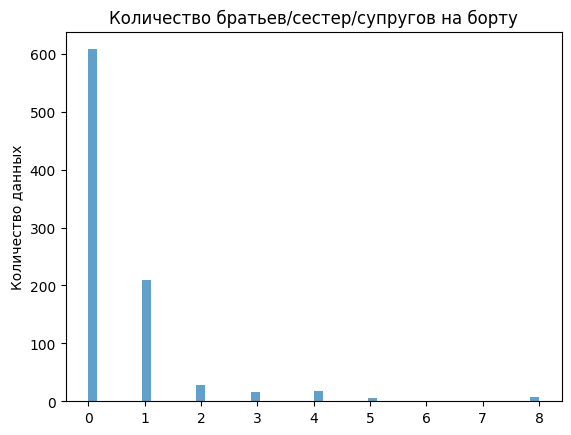

Мин: 0, Макс: 8
Среднее: 0.52, Медиана: 0.00
--------------------------------------------------

Анализ столбца: Количество родителей/детей на борту
Тип данных: int64


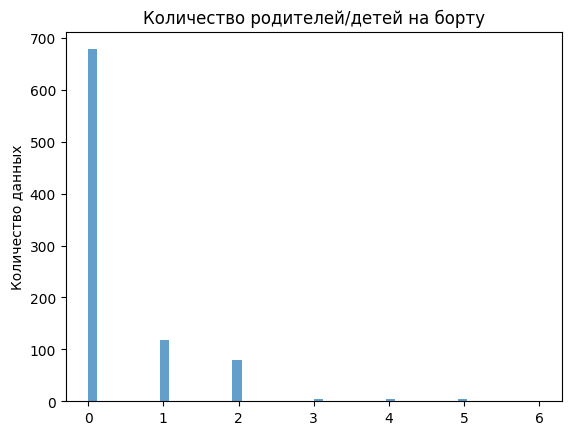

Мин: 0, Макс: 6
Среднее: 0.38, Медиана: 0.00
--------------------------------------------------

Анализ столбца: Номер билета
Тип данных: object
Уникальные значения: 681
Слишком много уникальных значений (681) для bar plot
--------------------------------------------------

Анализ столбца: Стоимость билета
Тип данных: float64


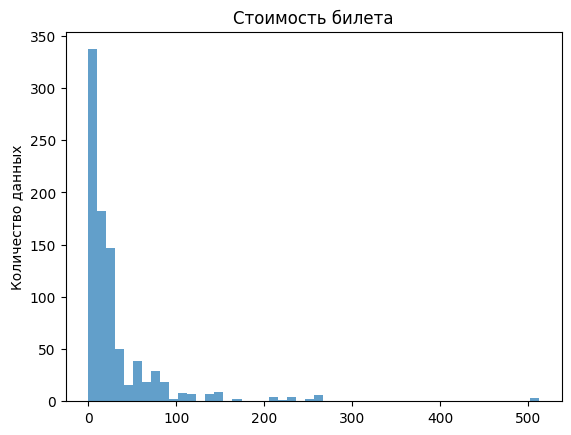

Мин: 0.0, Макс: 512.3292
Среднее: 32.20, Медиана: 14.45
--------------------------------------------------

Анализ столбца: Номер каюты
Тип данных: object
Уникальные значения: 147
Слишком много уникальных значений (147) для bar plot
--------------------------------------------------

Анализ столбца: Порт посадки
Тип данных: object
Уникальные значения: 3


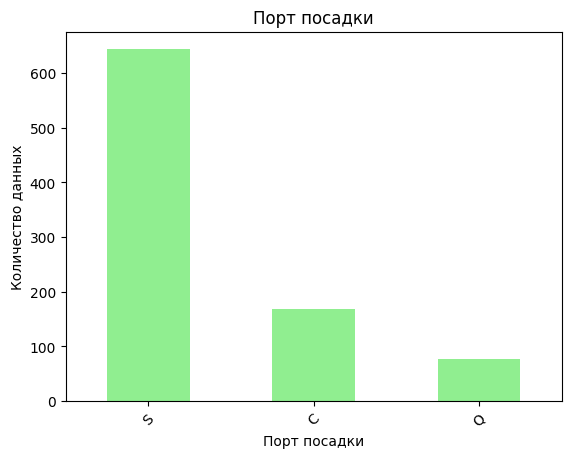

--------------------------------------------------


In [3]:
for row in data.columns:
    print(f"\nАнализ столбца: {row}")
    print(f"Тип данных: {data[row].dtype}")
    
    if data[row].dtype in [np.number, 'int64', 'float64']:
        # Числовые данные - гистограмма
        data[row].plot.hist(bins=50, title=f"{row}", ylabel='Количество данных', alpha=0.7)
        plt.show()
        
        # Дополнительная статистика
        print(f"Мин: {data[row].min()}, Макс: {data[row].max()}")
        print(f"Среднее: {data[row].mean():.2f}, Медиана: {data[row].median():.2f}")
        
    else:
        # Категориальные данные - bar plot
        print(f"Уникальные значения: {data[row].nunique()}")
        if data[row].nunique() <= 20:  # Если не слишком много уникальных значений
            value_counts = data[row].value_counts()
            value_counts.plot.bar(title=f"{row}", ylabel='Количество данных', color='lightgreen')
            plt.xticks(rotation=45)
            plt.show()
        else:
            print(f"Слишком много уникальных значений ({data[row].nunique()}) для bar plot")
            
    print("-" * 50)



In [11]:
mean_age = data.groupby("Выжил")["Возраст"].mean()
print(mean_age)

Выжил
0    30.626179
1    28.343690
Name: Возраст, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

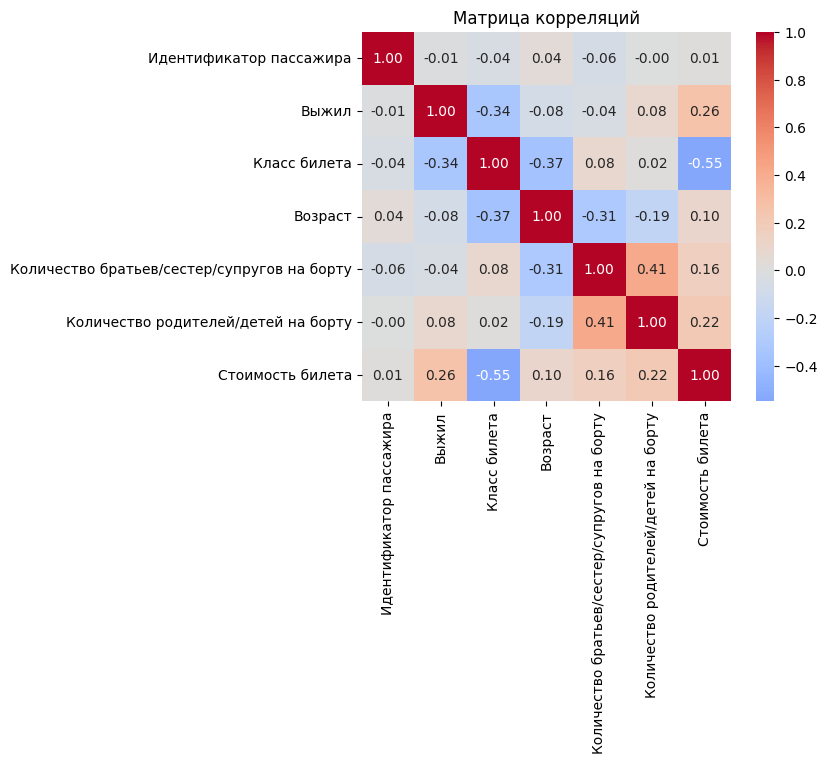

In [5]:
plt.Figure(figsize=(12,7))
num_data = data.select_dtypes(include=[np.number])

matrix_corr = num_data.corr()
sns.heatmap(data=matrix_corr,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.2f')
plt.title("Матрица корреляций")
plt.show

In [15]:
data[data["Возраст"] > 18]

,Идентификатор пассажира,Выжил,Класс билета,Имя,Пол,Возраст,Количество братьев/сестер/супругов на борту,Количество родителей/детей на борту,Номер билета,Стоимость билета,Номер каюты,Порт посадки
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [29]:
data.count()

Идентификатор пассажира                        891
Выжил                                          891
Класс билета                                   891
Имя                                            891
Пол                                            891
Возраст                                        714
Количество братьев/сестер/супругов на борту    891
Количество родителей/детей на борту            891
Номер билета                                   891
Стоимость билета                               891
Номер каюты                                    204
Порт посадки                                   889
dtype: int64

In [32]:
data.groupby(['Выжил','Пол'])['Возраст'].mean()

Выжил  Пол   
0      female    25.046875
       male      31.618056
1      female    28.847716
       male      27.276022
Name: Возраст, dtype: float64

In [ ]:

df_fam = data[(data['Количество братьев/сестер/супругов на борту'] > 0) | (data['Количество родителей/детей на борту'] > 0)]
#Количество погибших относительно семей (Видим, что больше выживших среди женщин)
df_fam.groupby('Пол')['Выжил'].agg(['mean','count'])


,mean,count
Пол,,
female,0.712766,188
male,0.271084,166


In [ ]:
df_fam.groupby(['Пол','Выжил'])['Возраст'].describe()

count       mean        std   min   25%   50%   75%   max
Пол    Выжил                                                           
female 0       43.0  23.453488  14.451402  2.00   9.5  25.0  35.5  48.0
       1      118.0  27.648305  15.426010  0.75  18.0  27.0  38.0  63.0
male   0      107.0  28.929907  15.124086  1.00  18.0  28.0  37.5  70.0
       1       42.0  19.563571  18.089243  0.42   3.0  14.5  35.0  60.0

In [68]:
teen = df_fam[df_fam['Возраст'] < 18]
adult = df_fam[df_fam['Возраст'] > 18]

teen['Выжил'].describe()
#teen.groupby(['Пол'])['Выжил'].agg(['mean','count'])


count    90.000000
mean      0.566667
std       0.498312
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Выжил, dtype: float64

In [69]:
adult['Выжил'].describe()

count    207.000000
mean       0.497585
std        0.501206
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Выжил, dtype: float64

In [ ]:
p_surv_male = 0.271084
p_surv_female = 0.712766
p_surv_teen = 0.566667
p_surv_adult = 0.497585

    

count    207.000000
mean       0.497585
std        0.501206
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Выжил, dtype: float64